In [1]:
import pandas as pd
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import numpy as np

In [2]:
# 그래프에서 한글을 표기하기 위해 글꼴 변경 
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':   # macOS
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [3]:
df = pd.read_csv('./data/final_data_after_winsorization.csv', index_col=0)

In [4]:
print('전체 컬럼명 : ', df.columns)

전체 컬럼명 :  Index(['2023년09월_전체세대', '2023년09월_1인세대', '2023년09월_2인세대', '2023년09월_3인세대',
       '2023년09월_4인세대', '2023년09월_5인세대', '2023년9월_6인가구이상', '채소가게수',
       '제로웨이스트 가게수', '유치원수', '거주인구대비취약자수', '거주인구대비취약자백분위수', '미세먼지지수',
       '미세먼지백분위', '행정구역면적', '공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)', '초등학교수',
       '사업체수 (개)', '종사자수 (명)', '채식식당수', '인구수', '1_0대', '1_10대', '1_20대',
       '1_30대', '1_40대', '1_50대', '1_60대', '1_70대', '1_80대', '1_90대', '1_기타',
       '2_0대', '2_10대', '2_20대', '2_30대', '2_40대', '2_50대', '2_60대', '2_70대',
       '2_80대', '2_90대', '2_기타', '카페수', '승하차인원_버스_지하철', '1점포당_1년_매출액',
       '행정동별_1년_매출액', '1인세대_(수)', '1인세대', '총_10대_(수)', '총_20_30대_(수)',
       '총_40_50대_(수)', '총_60대이상_(수)', '총_10대', '총_20_30대', '총_40_50대',
       '총_60대이상', '유치원_초등학교_(수)', '유치원_초등학교', '거주_유동_인구당_매출액'],
      dtype='object')


## 전체 상관계수

In [5]:
feature = ['2023년09월_전체세대', '2023년09월_1인세대', '2023년09월_2인세대', '2023년09월_3인세대',
       '2023년09월_4인세대', '2023년09월_5인세대', '2023년9월_6인가구이상', '채소가게수',
       '제로웨이스트 가게수', '유치원수', '거주인구대비취약자수', '거주인구대비취약자백분위수', '미세먼지지수',
       '미세먼지백분위', '행정구역면적', '공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)', '초등학교수',
       '사업체수 (개)', '종사자수 (명)', '채식식당수', '인구수', '1_0대', '1_10대', '1_20대',
       '1_30대', '1_40대', '1_50대', '1_60대', '1_70대', '1_80대', '1_90대', '1_기타',
       '2_0대', '2_10대', '2_20대', '2_30대', '2_40대', '2_50대', '2_60대', '2_70대',
       '2_80대', '2_90대', '2_기타', '카페수', '승하차인원_버스_지하철', '1점포당_1년_매출액',
       '행정동별_1년_매출액', '1인세대_(수)', '1인세대', '총_10대_(수)', '총_20_30대_(수)',
       '총_40_50대_(수)', '총_60대이상_(수)', '총_10대', '총_20_30대', '총_40_50대',
       '총_60대이상', '유치원_초등학교_(수)', '유치원_초등학교', '거주_유동_인구당_매출액']

In [6]:
print('전체 컬럼 수 : ' , len(feature))

전체 컬럼 수 :  63


### 인구특성 포함

In [7]:
df1 = df[feature]

In [8]:
df1_corr = df1.corr().abs()

C:\Users\min\AppData\Local\Temp\ipykernel_4288\2123153600.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df1_corr, dtype=np.bool)


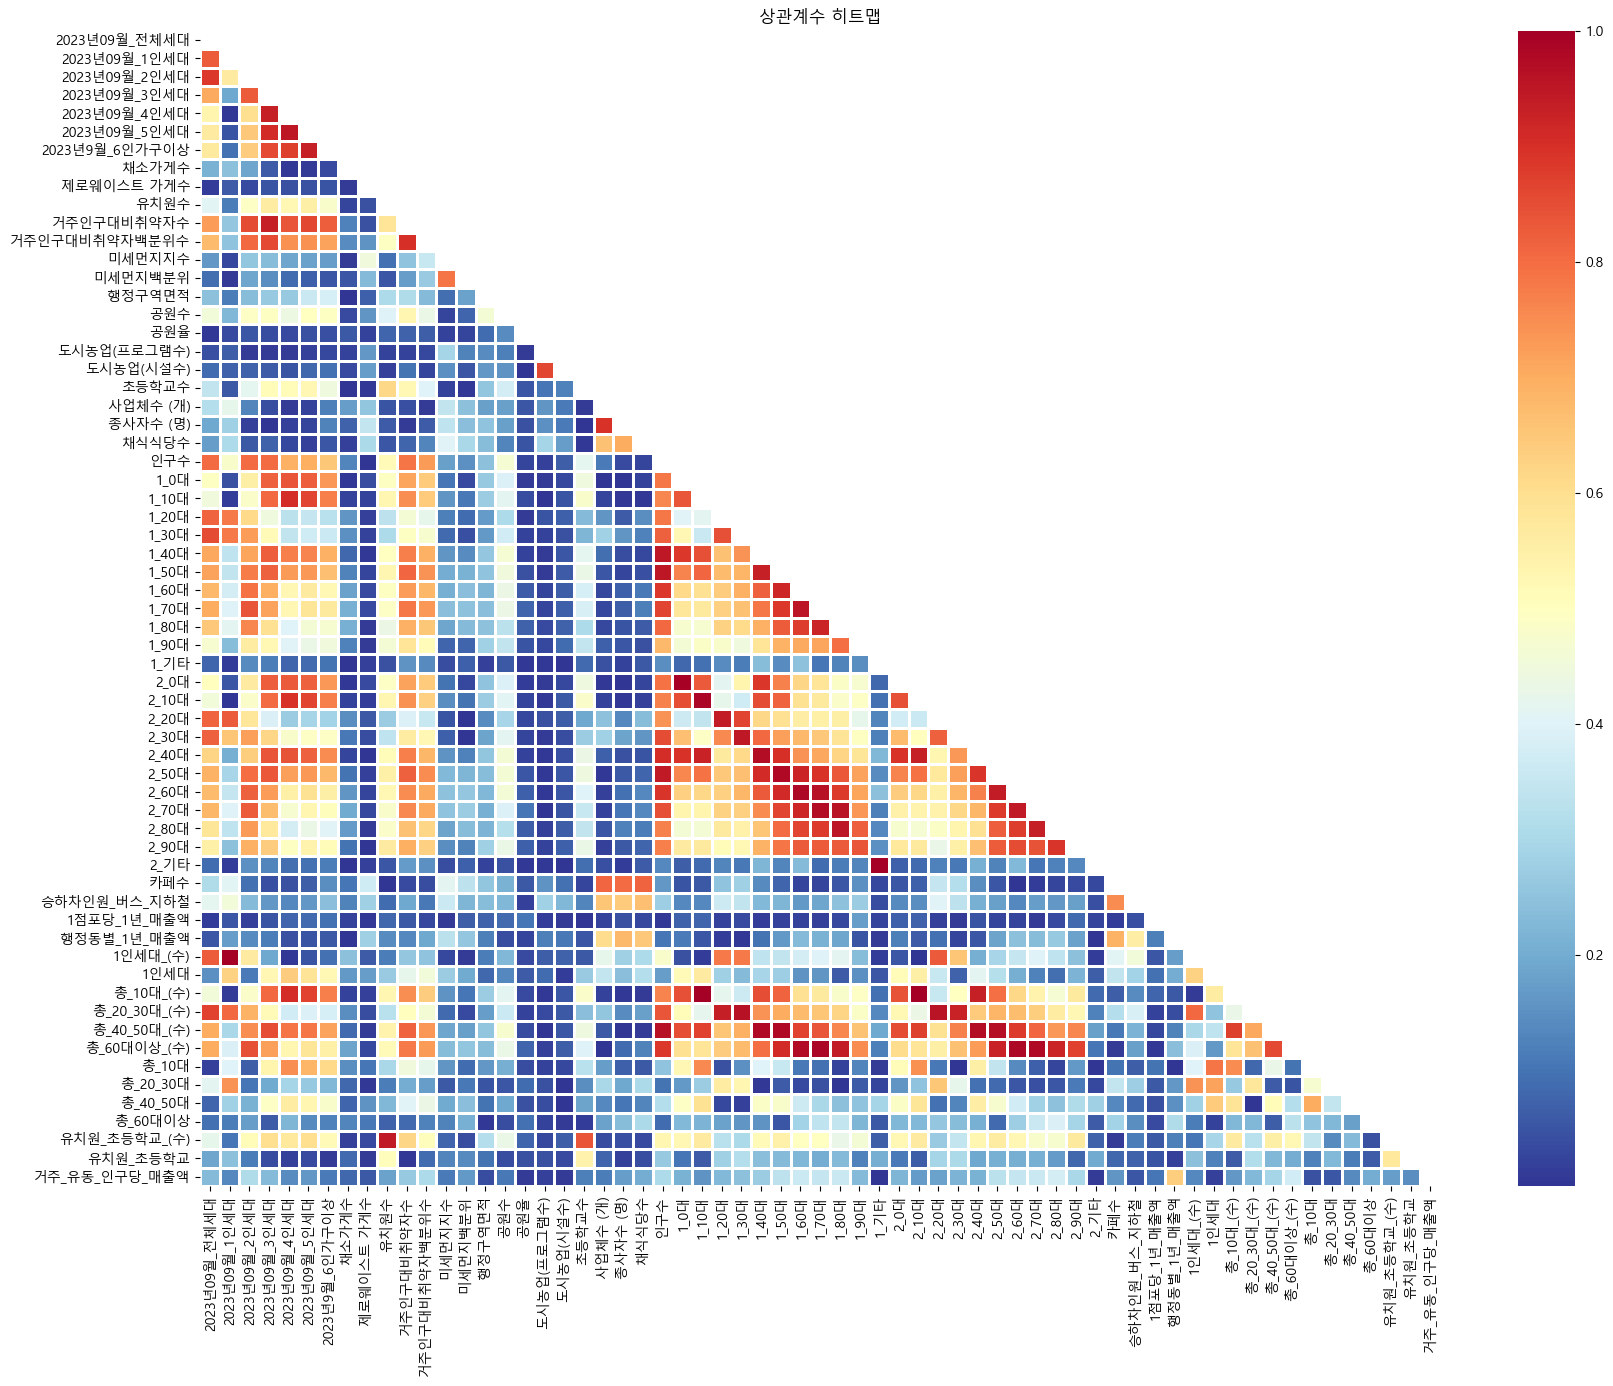

In [9]:
#AFTER 전체

plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df1_corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = df1_corr,    # 'corr' = 상관계수 테이블
            annot = False,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

### - 상관계수 낮은 컬럼만 남기기

In [10]:
final_feature = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대']

In [11]:
print('최종 컬럼 수 :', len(final_feature))

최종 컬럼 수 : 14


In [12]:
final_df = df[final_feature]

In [13]:
final_feature_corr = final_df.corr().abs()

C:\Users\min\AppData\Local\Temp\ipykernel_4288\2426818809.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(final_feature_corr, dtype=np.bool)


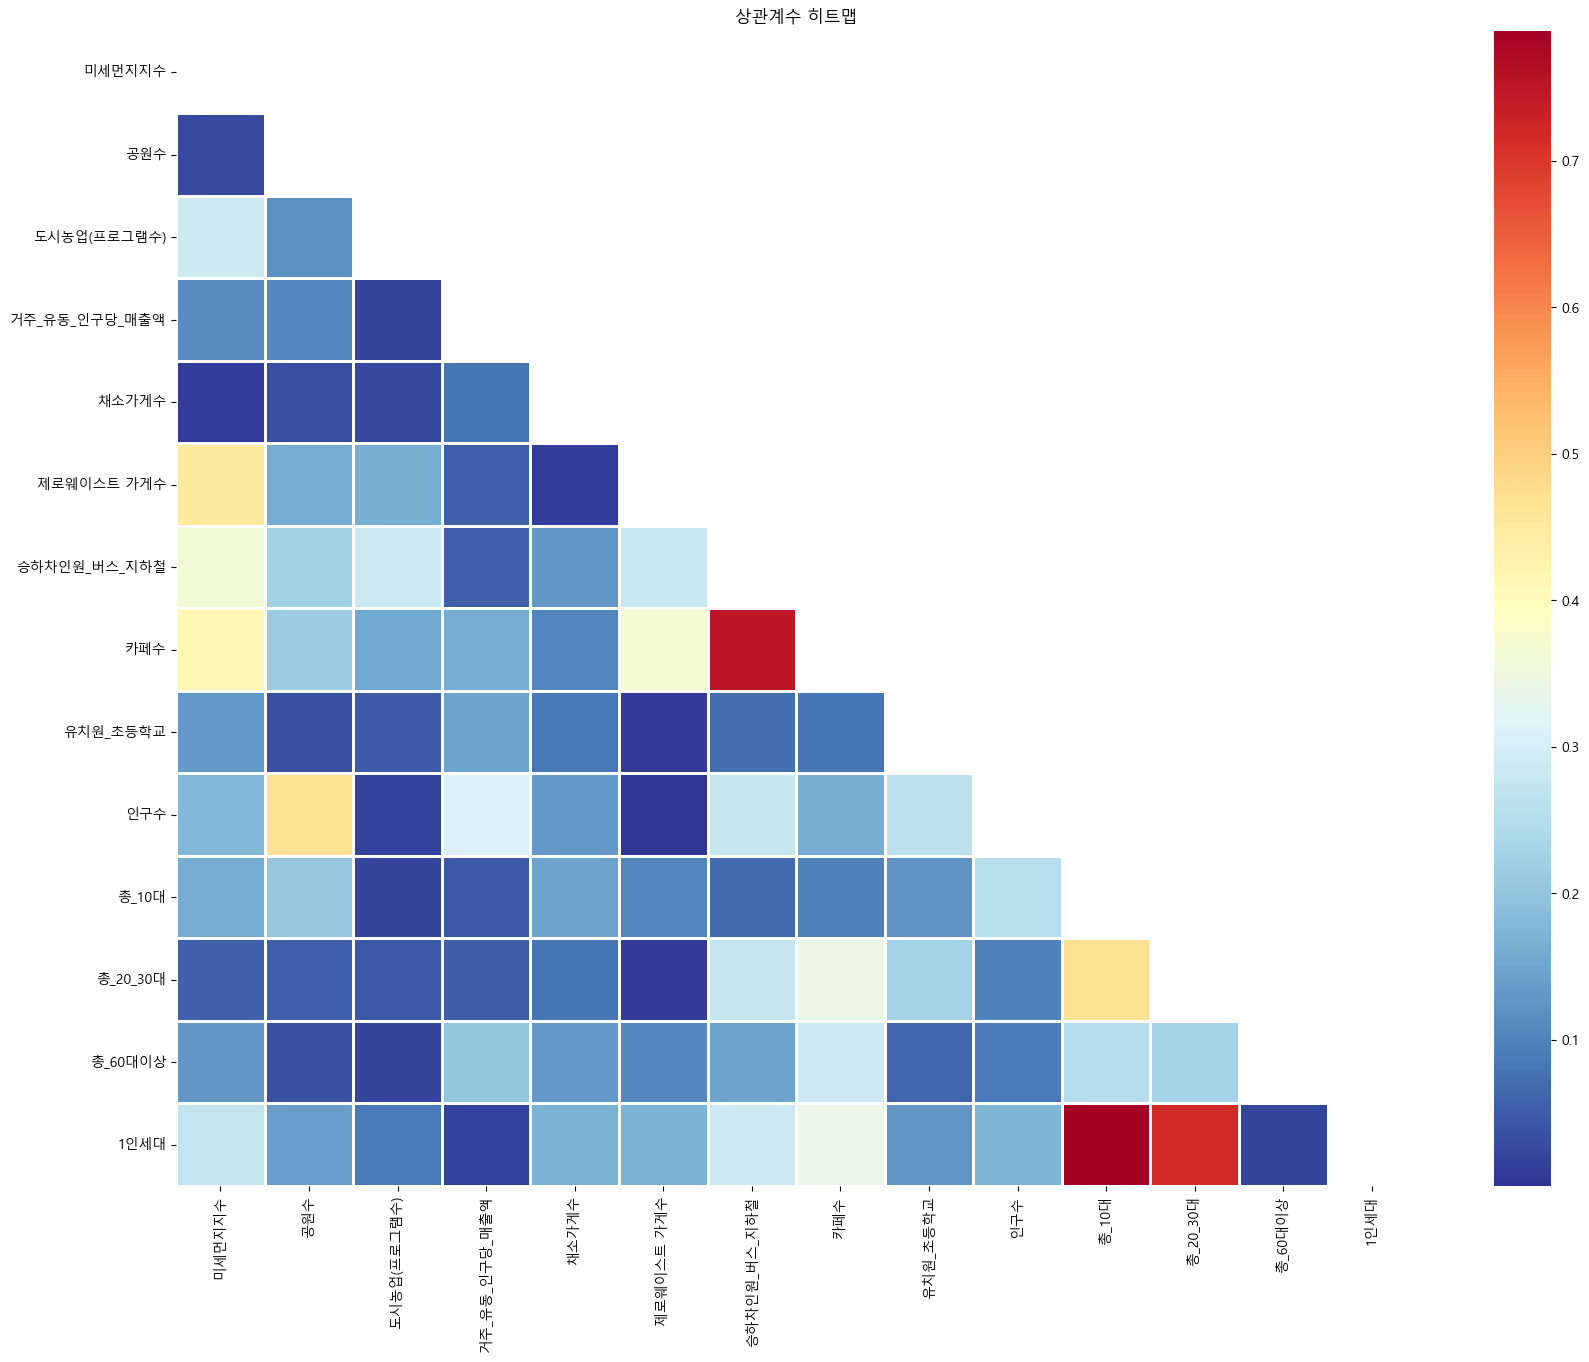

In [14]:
#AFTER 최종컬럼

plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(final_feature_corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = final_feature_corr,    # 'corr' = 상관계수 테이블
            annot = False,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

- VIF 계산

In [15]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(df_feat):
    vif2 = pd.DataFrame()
    vif2['VIF_Factor'] = [variance_inflation_factor(df_feat, i) for i in range(df_feat.shape[1])]
    vif2['Feature'] = df_feat.columns
    return vif2

vif2=feature_engineering_XbyVIF(final_df)
vif2[vif2['VIF_Factor']<10] #vif지수가 10보다 크거나 같은 feature 제거

,VIF_Factor,Feature
0,2.820563,미세먼지지수
1,3.559703,공원수
2,1.265043,도시농업(프로그램수)
3,1.924660,거주_유동_인구당_매출액
4,1.564663,채소가게수
5,1.567081,제로웨이스트 가게수
6,7.783421,승하차인원_버스_지하철
7,7.004812,카페수
8,4.214036,유치원_초등학교


### 인구특성 미포함

In [16]:
feature2 = ['2023년09월_1인세대', '2023년09월_2인세대', '2023년09월_3인세대',
    '2023년09월_4인세대', '2023년09월_5인세대', '2023년9월_6인가구이상', '채소가게수',
    '제로웨이스트 가게수', '유치원수', '거주인구대비취약자수', '미세먼지지수',
    '미세먼지백분위', '행정구역면적', '공원수', '도시농업(프로그램수)', '도시농업(시설수)', '초등학교수',
    '사업체수 (개)', '종사자수 (명)', '채식식당수','카페수', '승하차인원_버스_지하철', '1점포당_1년_매출액',
    '행정동별_1년_매출액','유치원_초등학교', '거주_유동_인구당_매출액']

In [17]:
print('인구특성 미포함 컬럼 수 :', len(feature2))

인구특성 미포함 컬럼 수 : 26


In [18]:
df2 = df[feature2]

In [19]:
df2_corr = df2.corr().abs()

C:\Users\min\AppData\Local\Temp\ipykernel_4288\3541050731.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df2_corr, dtype=np.bool)


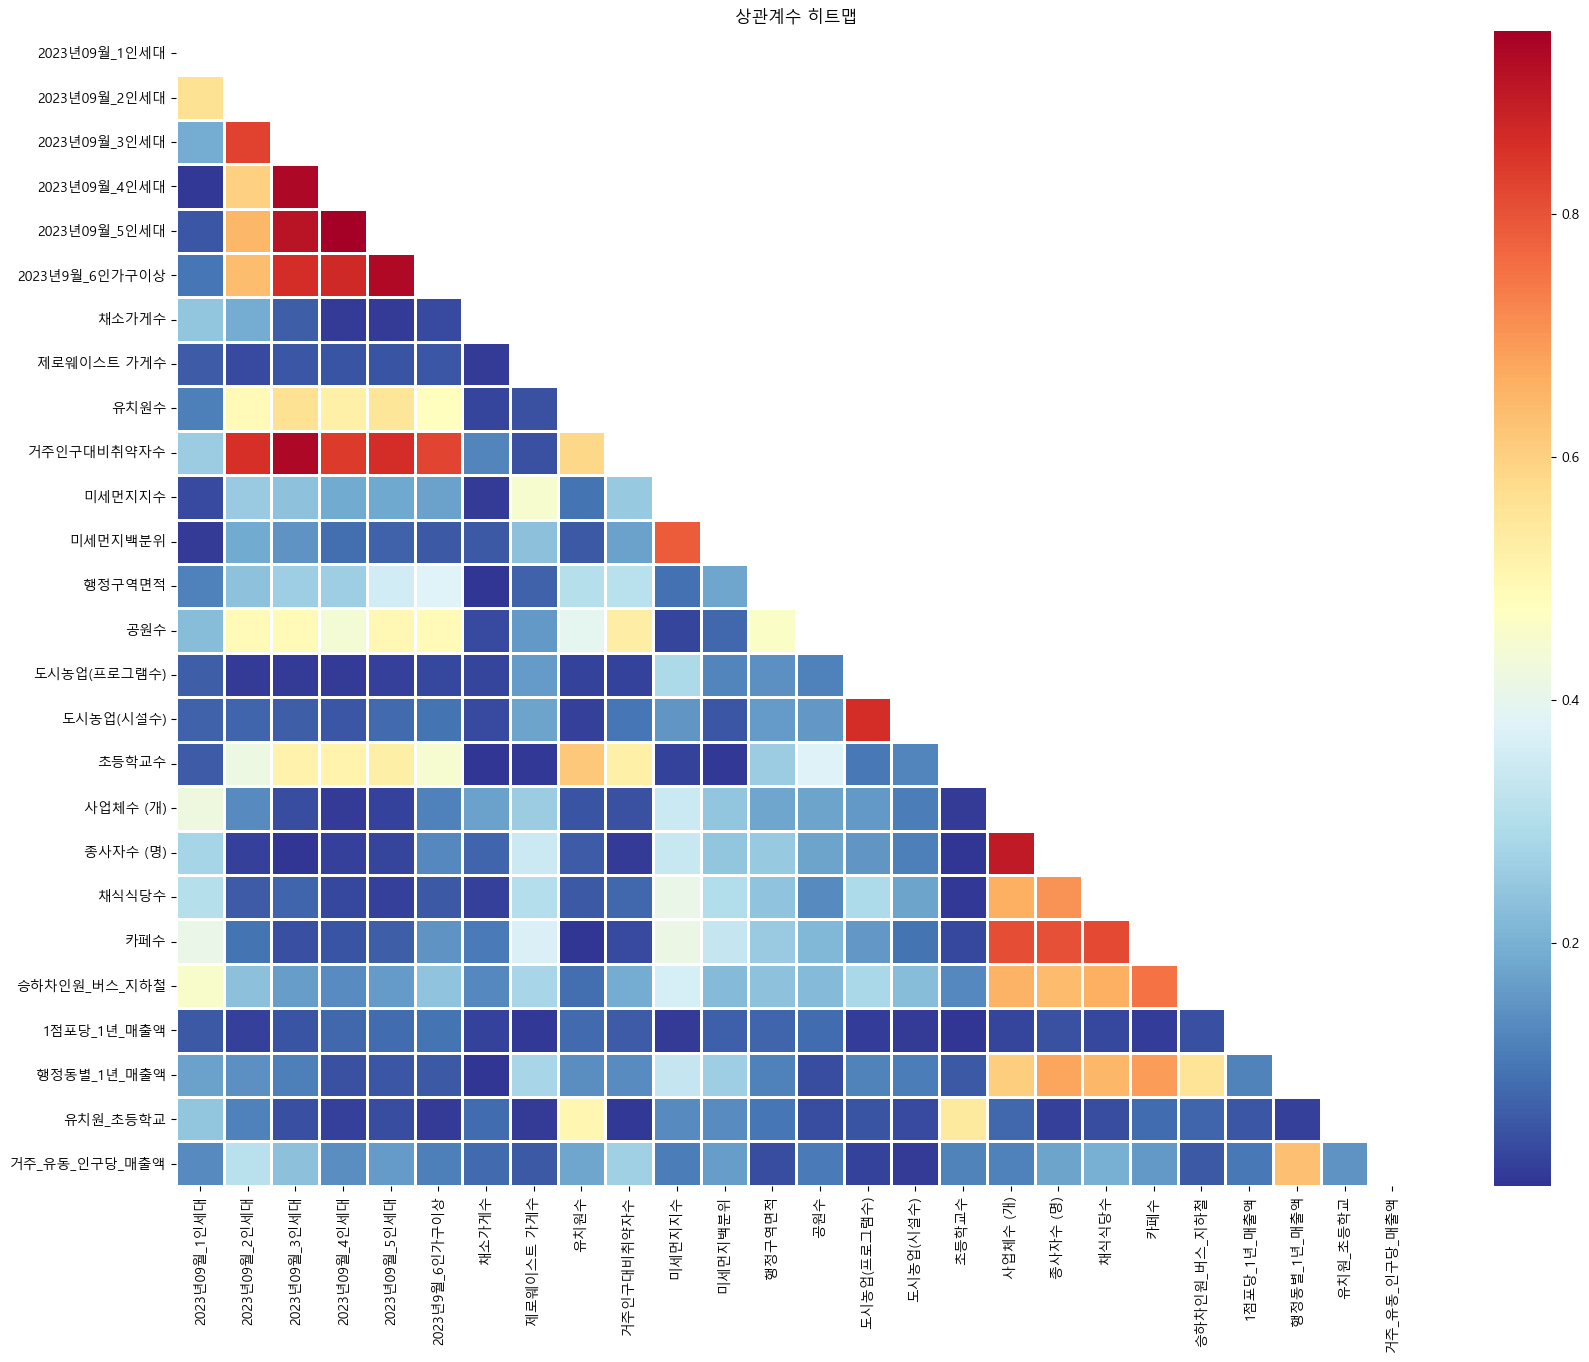

In [20]:
#AFTER 전체

plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df2_corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = df2_corr,    # 'corr' = 상관계수 테이블
            annot = False,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

### - 인구 미포함 상관계수 낮은 컬럼

In [21]:
final_feature2 = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교']

In [22]:
print('최종 컬럼 수 :', len(final_feature2))

최종 컬럼 수 : 9


In [23]:
final_df2 = df[final_feature2]

In [24]:
final_feature2_corr = final_df2.corr().abs()

C:\Users\min\AppData\Local\Temp\ipykernel_4288\1525732480.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(final_feature2_corr, dtype=np.bool)


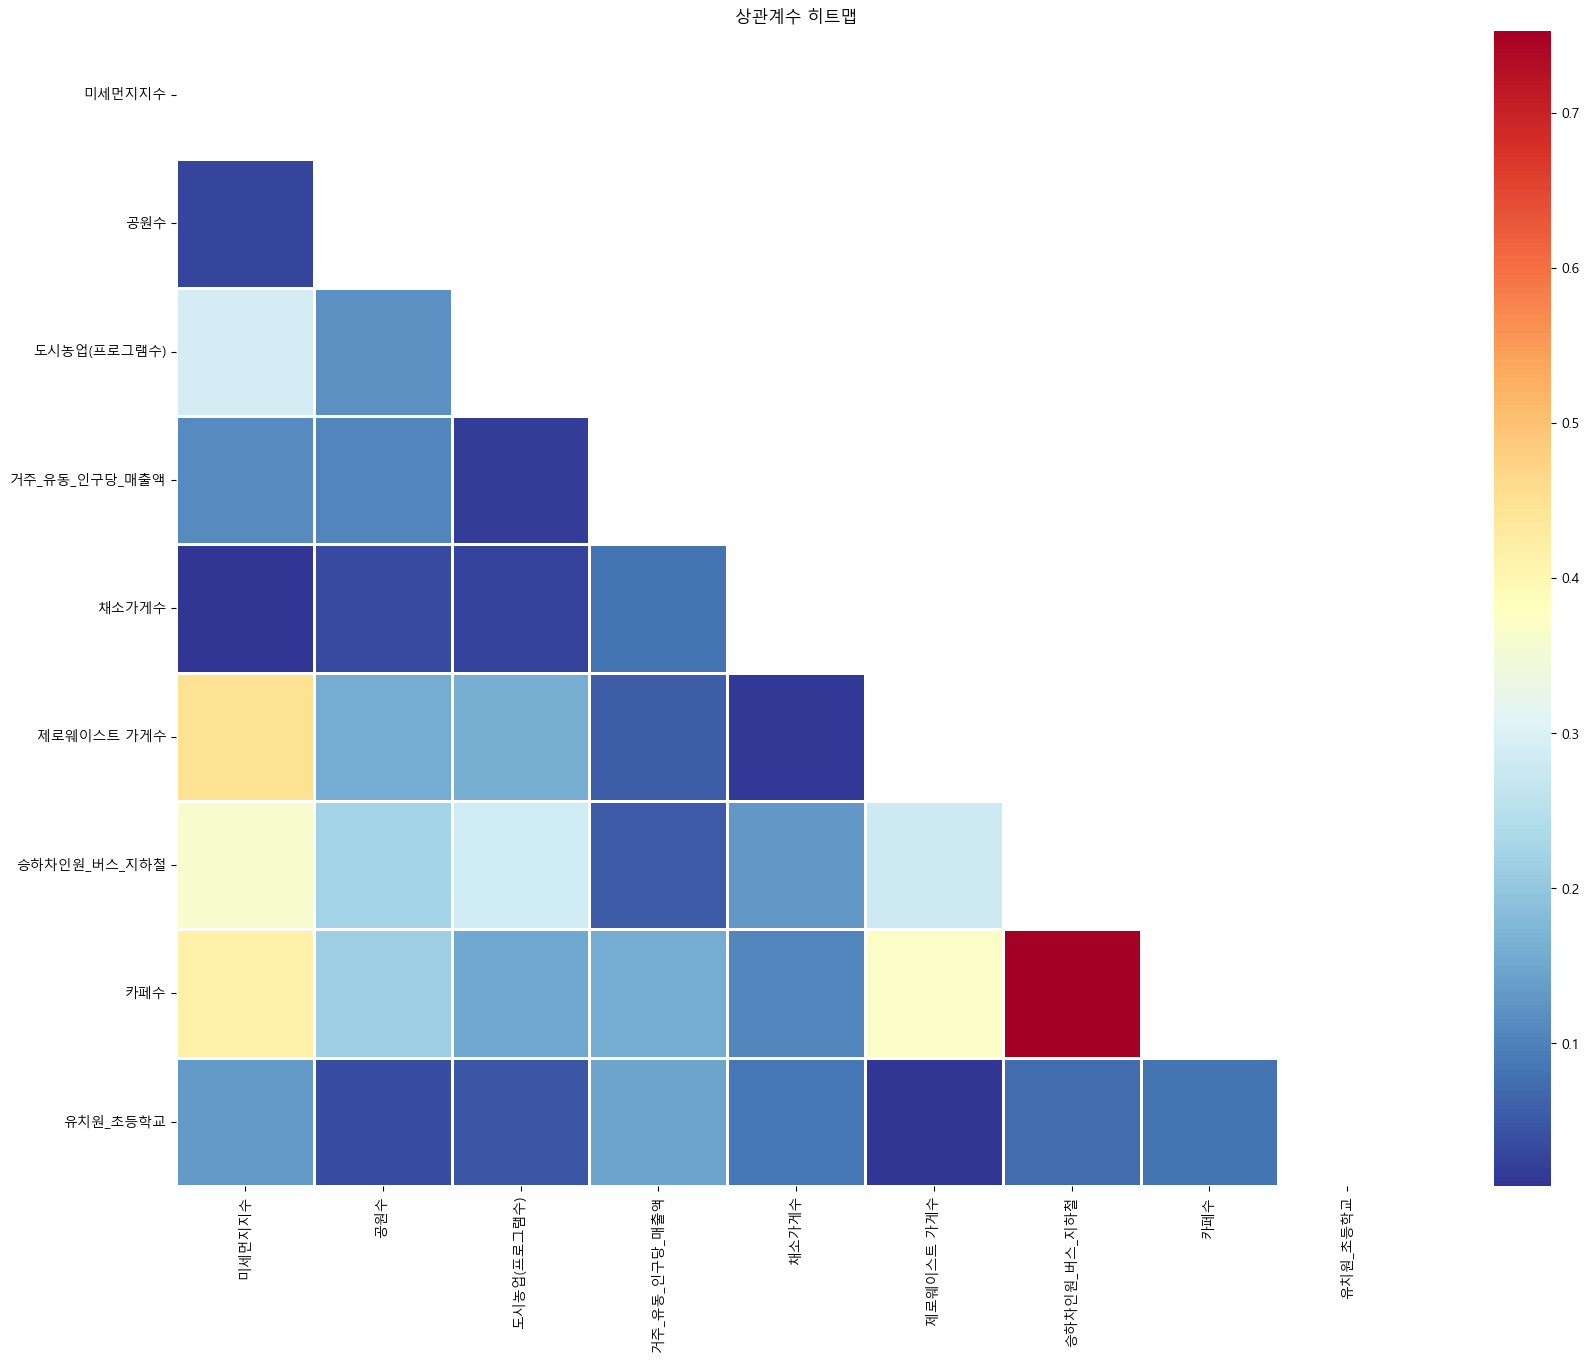

In [25]:
#AFTER 최종컬럼

plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(final_feature2_corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = final_feature2_corr,    # 'corr' = 상관계수 테이블
            annot = False,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

- VIF 계산

In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(df_feat):
    vif2 = pd.DataFrame()
    vif2['VIF_Factor'] = [variance_inflation_factor(df_feat, i) for i in range(df_feat.shape[1])]
    vif2['Feature'] = df_feat.columns
    return vif2

vif2=feature_engineering_XbyVIF(final_df2)
vif2[vif2['VIF_Factor']<10] #vif지수가 10보다 크거나 같은 feature 제거

,VIF_Factor,Feature
0,2.592936,미세먼지지수
1,2.420196,공원수
2,1.246733,도시농업(프로그램수)
3,1.676148,거주_유동_인구당_매출액
4,1.382560,채소가게수
5,1.494686,제로웨이스트 가게수
6,6.707578,승하차인원_버스_지하철
7,6.328799,카페수
8,2.682454,유치원_초등학교


# final selected feature df

In [27]:
final_selected_feature = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대']


In [28]:
final_selected_feature_df = df[final_selected_feature]

In [30]:
final_selected_feature_df

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
가락1동,16.560,2,0.0,26.850496,10.0,0.0,184724.0,43.0,0.000054,55068,0.095664,0.272572,0.211411,0.166023
가락2동,16.560,9,0.0,35.834189,3.0,0.0,190052.0,74.0,0.000096,62654,0.104766,0.277141,0.225971,0.288323
가락본동,16.560,9,0.0,140.930507,9.0,2.0,273627.0,99.0,0.000079,50842,0.064317,0.319067,0.252586,0.416045
가리봉동,15.774,0,0.0,7.196665,5.0,0.0,230955.0,11.0,0.000109,9200,0.026087,0.335870,0.287935,0.730643
가산동,17.357,3,0.0,139.446507,7.0,0.0,940108.0,239.0,0.000020,49292,0.026130,0.546052,0.177798,0.779580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,18.927,2,0.0,63.851147,1.0,0.0,140945.0,11.0,0.000046,21514,0.064423,0.335874,0.215302,0.371507
후암동,18.927,2,0.0,83.573038,0.0,1.0,176879.0,29.0,0.000093,32296,0.068368,0.311370,0.265172,0.513595
휘경1동,14.243,1,0.0,24.694998,0.0,0.0,402280.0,35.0,0.000036,27806,0.058764,0.418902,0.217435,0.598816


In [29]:
final_selected_feature_df.to_csv('./data/final_data_after_winsorization_with_selected_features.csv')